<a href="https://colab.research.google.com/github/GitAnnaV/IIS/blob/main/LAB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Практическая работа №1 Тема: Кластеризация (методом k-средних)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = np.array([[0.98646576, 5.51913649],
                 [6.656122  , 1.32179868],
                 [13.60477793,10.893459],
                 [8.07878556, 1.3718204],
                 [8.57899244, 1.47117364],
                 [11.99218844,10.00278782],
                 [13.67976969,11.85890877],
                 [12.19374903,10.58436694],
                 [13.55191111,13.96586486],
                 [1.5781104 , 5.44062481],
                 [2.54998842, 5.44290953],
                 [7.53947816, 1.97682327],
                 [7.77573917, 1.68741545],
                 [7.40382337, 1.61830924],
                 [13.41401174,11.48837435],
                 [12.30343385,11.38964818],
                 [11.90342996,12.60480311],
                 [12.97102516,12.80274314],
                 [-0.07186881, 5.86578557],
                 [2.26956487, 4.90899589],
                 [2.14966222, 5.95087446],
                 [7.08068989, 1.74118832],
                 [-1.04242483, 6.15611081],
                 [7.1638765 , 1.55096862],
                 [2.73191408, 5.31414116],
                 [0.14906354, 5.22115529],
                 [1.82965708, 5.14288032],
                 [7.89212069, 2.29383977],
                 [12.43004693,14.14097804],
                 [7.60045453, 2.2328528]])

Определение достаточного количества кластеров методом Elbow:


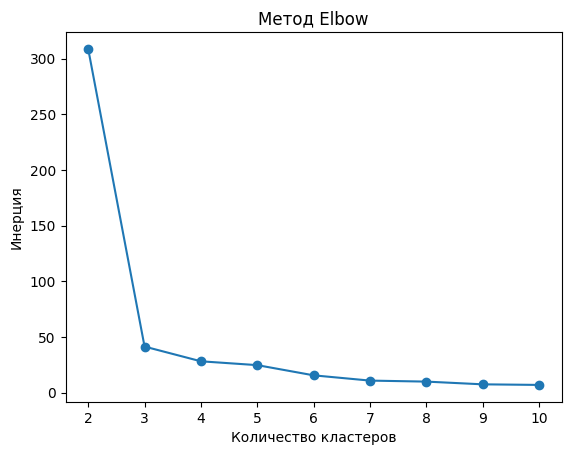

In [4]:
# Список для значений инерции (Сумма квадратов расстояний от точек до ближ. центроидов)
inertia_values = []

# Перебираем количество кластеров от 2 до 10 (включительно)
# Начинаю с 2, т.к. с 1 - всё будет в одной куче
for k in range(2, 11):
  # Разделяем на группы (k - кол-во групп)
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(data)
  # Результат: насколько далеко значение от центроида (число в список inertia_values)
  inertia_values.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia_values, marker='o')
plt.xlabel("Количество кластеров")
plt.ylabel("Инерция")
plt.title("Метод Elbow")
plt.show()

Анализ результатов: На графике чётко виден "локоть" при k=3, после 3 кластеров уменьшение инерции значительно замедляется. Добавление 4 и последующих кластеров даёт минимальное улучшение

Метки кластеров: [0 2 1 2 2 1 1 1 1 0 0 2 2 2 1 1 1 1 0 0 0 2 0 2 0 0 0 2 1 2]
Координаты центроидов: [[ 1.31301327  5.49626143]
 [12.80443438 11.97319342]
 [ 7.57700823  1.72661902]]
В кластере с меткой 0 содержится 10 точек
В кластере с меткой 1 содержится 10 точек
В кластере с меткой 2 содержится 10 точек


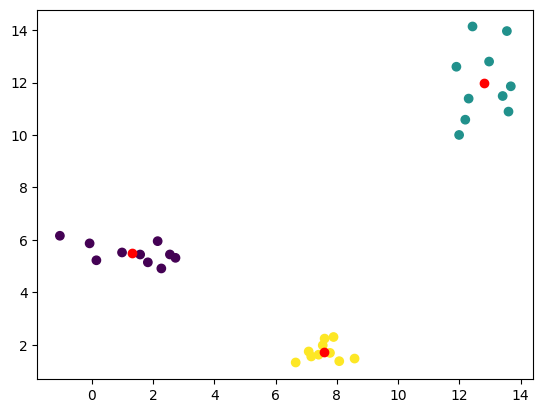

In [10]:
kmeans = KMeans(n_clusters = 3)

# Разделение на кластеры
kmeans.fit(data)

# Метки кластеров для каждого объекта
labels = kmeans.labels_

# Координаты центроидов
centroids = kmeans.cluster_centers_

print("Метки кластеров:", labels)
print("Координаты центроидов:", centroids)

# Просмотр меток кластеров [0, 1, 2] - 3 кластера
labelNum = np.unique(labels)
# Проходимся по каждому кластеру, считаем количество принадлежащих ему точек
for v in labelNum:
  print(f"В кластере с меткой {v} содержится {np.sum(labels == v)} точек")

plt.scatter(data[:,0], data[:,1], c = labels)
plt.scatter(centroids[:,0], centroids[:,1], c= "r")
plt.show()